In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

class FibGNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Linear map from 2 inputs (last 2 numbers) to 1 output (next number)
        self.fc = nn.Linear(2, 1, bias=False)

    def forward(self, last_two):
        # last_two: tensor [batch, 2] with [F_n, F_{n+1}]
        return self.fc(last_two)


In [2]:
# If the graph is the Fibonacci sequence

n = 12

fib = [1, 1]
X = []
Y = []

for i in range(2, n):
    fib.append(fib[-1] + fib[-2])
    X.append([fib[-2], fib[-3]])  # last two numbers
    Y.append(fib[-1])  # next number

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32).unsqueeze(1)

print("Input Y:", Y)

Input Y: tensor([[  2.],
        [  3.],
        [  5.],
        [  8.],
        [ 13.],
        [ 21.],
        [ 34.],
        [ 55.],
        [ 89.],
        [144.]])


In [3]:

# Train model
model = FibGNN()
opt = torch.optim.SGD(model.parameters(), lr=1e-4)

In [4]:
for epoch in range(20000):
    pred = model(X).squeeze()
    loss = F.mse_loss(pred, Y.squeeze())
    opt.zero_grad()
    loss.backward()
    opt.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")


print("Learned weight matrix:", model.fc.weight.data)

Epoch 0, Loss: 2327.801513671875
Epoch 1000, Loss: 0.018139077350497246
Epoch 2000, Loss: 0.01801559142768383
Epoch 3000, Loss: 0.01789308711886406
Epoch 4000, Loss: 0.017771387472748756
Epoch 5000, Loss: 0.0176506657153368
Epoch 6000, Loss: 0.017530756071209908
Epoch 7000, Loss: 0.01741183176636696
Epoch 8000, Loss: 0.017293784767389297
Epoch 9000, Loss: 0.017176657915115356
Epoch 10000, Loss: 0.01706014946103096
Epoch 11000, Loss: 0.016944238916039467
Epoch 12000, Loss: 0.01682870462536812
Epoch 13000, Loss: 0.016713639721274376
Epoch 14000, Loss: 0.016599265858530998
Epoch 15000, Loss: 0.016485678032040596
Epoch 16000, Loss: 0.01637297309935093
Epoch 17000, Loss: 0.01626117154955864
Epoch 18000, Loss: 0.01615023799240589
Epoch 19000, Loss: 0.01604011468589306
Learned weight matrix: tensor([[1.5077, 0.1785]])


In [5]:
# If the graph is the Fibonacci sequence

n = 20

fib = [1, 60]
X = []
Y = []

for i in range(2, n):
    fib.append(0.3*fib[-1] -0.6*fib[-2])
    X.append([fib[-2], fib[-3]])  # last two numbers
    Y.append(fib[-1])  # next number

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32).unsqueeze(1)

print("Input Y:", Y)

Input Y: tensor([[ 17.4000],
        [-30.7800],
        [-19.6740],
        [ 12.5658],
        [ 15.5741],
        [ -2.8672],
        [-10.2047],
        [ -1.3411],
        [  5.7205],
        [  2.5208],
        [ -2.6761],
        [ -2.3153],
        [  0.9110],
        [  1.6625],
        [ -0.0479],
        [ -1.0119],
        [ -0.2748],
        [  0.5247]])


In [6]:

# Train model
model = FibGNN()
opt = torch.optim.SGD(model.parameters(), lr=1e-4)

In [7]:
for epoch in range(20000):
    pred = model(X).squeeze()
    loss = F.mse_loss(pred, Y.squeeze())
    opt.zero_grad()
    loss.backward()
    opt.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")


print("Learned weight matrix:", model.fc.weight.data)

Epoch 0, Loss: 20.435993194580078
Epoch 1000, Loss: 9.76316458234372e-11
Epoch 2000, Loss: 9.76316458234372e-11
Epoch 3000, Loss: 9.76316458234372e-11
Epoch 4000, Loss: 9.76316458234372e-11
Epoch 5000, Loss: 9.76316458234372e-11
Epoch 6000, Loss: 9.76316458234372e-11
Epoch 7000, Loss: 9.76316458234372e-11
Epoch 8000, Loss: 9.76316458234372e-11
Epoch 9000, Loss: 9.76316458234372e-11
Epoch 10000, Loss: 9.76316458234372e-11
Epoch 11000, Loss: 9.76316458234372e-11
Epoch 12000, Loss: 9.76316458234372e-11
Epoch 13000, Loss: 9.76316458234372e-11
Epoch 14000, Loss: 9.76316458234372e-11
Epoch 15000, Loss: 9.76316458234372e-11
Epoch 16000, Loss: 9.76316458234372e-11
Epoch 17000, Loss: 9.76316458234372e-11
Epoch 18000, Loss: 9.76316458234372e-11
Epoch 19000, Loss: 9.76316458234372e-11
Learned weight matrix: tensor([[ 0.3000, -0.6000]])


In [8]:
# Example of a sine oscilation

# If the graph is the Fibonacci sequence

n = 40

x = torch.linspace(0, 4*3.14, n)
y = torch.sin(x)

X=[]
for i in range(3, n):
    X.append([y[i-1], y[i-2], y[i-3]])  # last three numbers

X = torch.tensor(X, dtype=torch.float32)
Y = y[3:].detach().clone().unsqueeze(1)

print("Input Y:", Y.shape)
print("Input X:", X.shape)

print(X[0], Y[0])

Input Y: torch.Size([37, 1])
Input X: torch.Size([37, 3])
tensor([0.6005, 0.3165, 0.0000]) tensor([0.8227])


In [9]:
class FibGNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Linear map from 3 inputs (last 3 numbers) to 1 output (next number)
        self.fc1 = nn.Linear(3, 5, bias=False)
        self.fc2 = nn.Linear(5, 1, bias=False)

    def forward(self, last_two):
        # last_two: tensor [batch, 2] with [F_n, F_{n+1}]
        x = self.fc1(last_two)
        return self.fc2(x)

In [10]:

# Train model
model = FibGNN()


In [11]:
opt = torch.optim.SGD(model.parameters(), lr=1e-3)

for epoch in range(20000):
    pred = model(X).squeeze()
    loss = F.mse_loss(pred, Y.squeeze())
    opt.zero_grad()
    loss.backward()
    opt.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")


#print("Learned weight matrix:", model.fc.weight.data)

Epoch 0, Loss: 0.5653719305992126
Epoch 1000, Loss: 0.14279821515083313
Epoch 2000, Loss: 0.07634826004505157
Epoch 3000, Loss: 0.042629070580005646
Epoch 4000, Loss: 0.021167809143662453
Epoch 5000, Loss: 0.009417221881449223
Epoch 6000, Loss: 0.0038354075513780117
Epoch 7000, Loss: 0.001465782173909247
Epoch 8000, Loss: 0.0005369125865399837
Epoch 9000, Loss: 0.00019144441466778517
Epoch 10000, Loss: 6.714601477142423e-05
Epoch 11000, Loss: 2.331662290089298e-05
Epoch 12000, Loss: 8.04960018285783e-06
Epoch 13000, Loss: 2.769755383269512e-06
Epoch 14000, Loss: 9.535267508908873e-07
Epoch 15000, Loss: 3.281418514688994e-07
Epoch 16000, Loss: 1.126999364942094e-07
Epoch 17000, Loss: 4.03621776001728e-08
Epoch 18000, Loss: 1.418604522740452e-08
Epoch 19000, Loss: 5.007058767603212e-09


In [32]:
# Predict series starting from x[5]

preds = [y[2], y[1], y[0]]
x_extended = torch.linspace(4*3.14, 8*3.14, n)  # Extension for prediction
x_ = torch.cat([x, x_extended[1:]])  # Concatenate (skip first to avoid duplicate)


for i in range(2*n-3 - 1):
    input_ = preds[0:3]
    input_ = torch.tensor(input_, dtype=torch.float32).unsqueeze(0)
    pred = model(input_).item()
    preds.insert(0, pred)  # Insert at beginning instead of append


preds = preds[::-1]  # Reverse to get correct order
print(preds)

print(x_.shape)


[tensor(0.), tensor(0.3165), tensor(0.6005), 0.8226271867752075, 0.9601857662200928, 0.9989659786224365, 0.9350420832633972, 0.774960458278656, 0.5352292060852051, 0.2404813915491104, -0.0789431482553482, -0.39021581411361694, -0.6613132953643799, -0.8643792867660522, -0.97853022813797, -0.9920506477355957, -0.9035553932189941, -0.7221654057502747, -0.4665391147136688, -0.16297709941864014, 0.15730386972427368, 0.4613643288612366, 0.7179437875747681, 0.900662899017334, 0.9907452464103699, 0.9789389371871948, 0.8664732575416565, 0.6649253368377686, 0.3950328826904297, 0.08455681800842285, -0.23457130789756775, -0.5295357704162598, -0.7700090408325195, -0.9312716722488403, -0.9967520236968994, -0.9597301483154297, -0.824026882648468, -0.6036096811294556, -0.3211550712585449, -0.005715563893318176, 0.3102686107158661, 0.5943055152893066, 0.817192792892456, 0.956019937992096, 0.9965232610702515, 0.9345512986183167, 0.7764903903007507, 0.5386067628860474, 0.24537208676338196, -0.07305340468

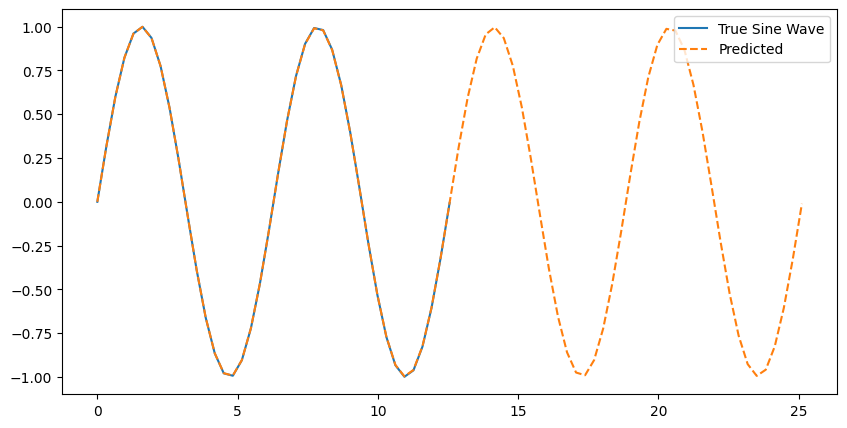

In [33]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(x.numpy(), y.numpy(), label='True Sine Wave')
plt.plot(x_.numpy(), preds, label='Predicted', linestyle='--')
plt.legend()
plt.show()

In [40]:
y = 3*torch.sin(x)

# Predict series starting from x[5]

preds = [y[2], y[1], y[0]]


for i in range(n-3):
    input_ = preds[0:3]
    input_ = torch.tensor(input_, dtype=torch.float32).unsqueeze(0)
    pred = model(input_).item()
    preds.insert(0, pred)  # Insert at beginning instead of append


preds = preds[::-1]  # Reverse to get correct order
print(preds)

print(x_.shape)

[tensor(0.), tensor(0.9495), tensor(1.8014), 2.467881679534912, 2.8805575370788574, 2.9968979358673096, 2.805126190185547, 2.324881076812744, 1.6056874990463257, 0.7214440107345581, -0.23682951927185059, -1.1706476211547852, -1.9839401245117188, -2.5931382179260254, -2.935590982437134, -2.976152181625366, -2.7106666564941406, -2.166496515274048, -1.3996176719665527, -0.48893141746520996, 0.47191160917282104, 1.3840932846069336, 2.153831720352173, 2.70198917388916, 2.972236156463623, 2.936817169189453, 2.5994200706481934, 1.9947761297225952, 1.1850987672805786, 0.2536703944206238, -0.7037140130996704, -1.5886075496673584, -2.3100271224975586, -2.7938151359558105, -2.990255832672119, -2.879190444946289, -2.4720804691314697, -1.8108289241790771, -0.96346515417099, -0.01714646816253662]
torch.Size([79])


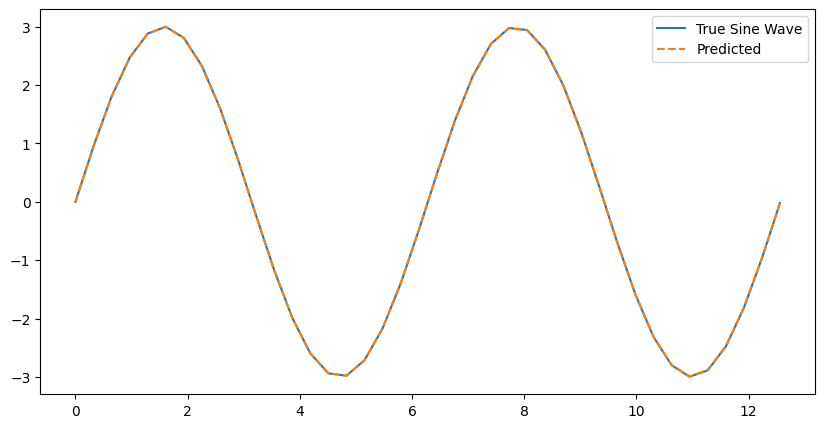

In [41]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(x.numpy(), y.numpy(), label='True Sine Wave')
plt.plot(x.numpy(), preds, label='Predicted', linestyle='--')
plt.legend()
plt.show()